# AI FINAL PROJECT by Sanjeevani Sutrave

## LIBRARIES USED

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import imblearn
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## IMPORTING DATASET

In [2]:
data = pd.read_csv("credit_card_data.csv")
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [3]:
data.shape

(9709, 20)

## DATA CLEANING

## NULL VALUE DETECTION

In [4]:
data.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

## OUTLIER DETECTION

<AxesSubplot:>

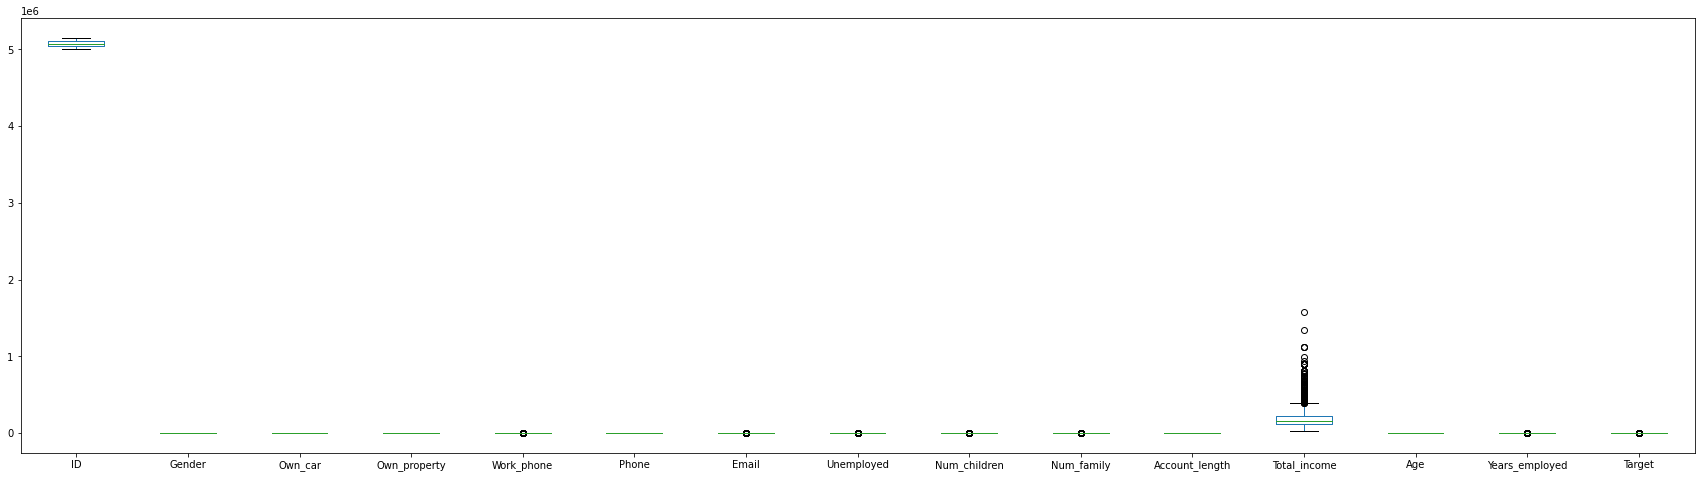

In [5]:
plt.figure(figsize = (30,8))
data.boxplot(grid = False)

In [6]:
def IQR(data):
    quartile_1 = np.percentile(data,25)
    quartile_3 = np.percentile(data,75)
    IQR = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5 * IQR)
    upper_bound = quartile_3 + (1.5 * IQR)
    print("Lower_Bound: ", lower_bound, "\nUpper_Bound: ", upper_bound)

In [7]:
IQR(data["Total_income"])

Lower_Bound:  -56250.0 
Upper_Bound:  393750.0


In [8]:
data[data["Total_income"]>393750.0].shape

(318, 20)

In [9]:
data.shape

(9709, 20)

- Since the outliers are less than 5% of the entire data it won't affect the model's accuracy  

## CHECKING DATA TYPE OF THE COLUMNS

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

## LABEL ENCODING

In [11]:
for columns in data:
    if data[columns].dtypes == 'object':
        data[columns] = LabelEncoder().fit_transform(data[columns])
data.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int64  
 15  Education_type   9709 non-null   int64  
 16  Family_status    9709 non-null   int64  
 17  Housing_type  

## EXPLORATORY DATA ANALYSIS

## PIE CHART

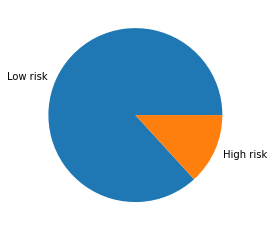

In [13]:
plt.pie(data["Target"].value_counts(), labels = ["Low risk","High risk"])
plt.show()

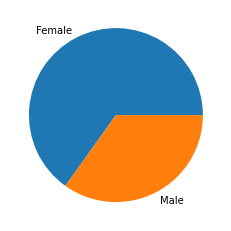

In [14]:
plt.pie(data["Gender"].value_counts(), labels = ["Female","Male"])
plt.show()

## SCATTERPLOT

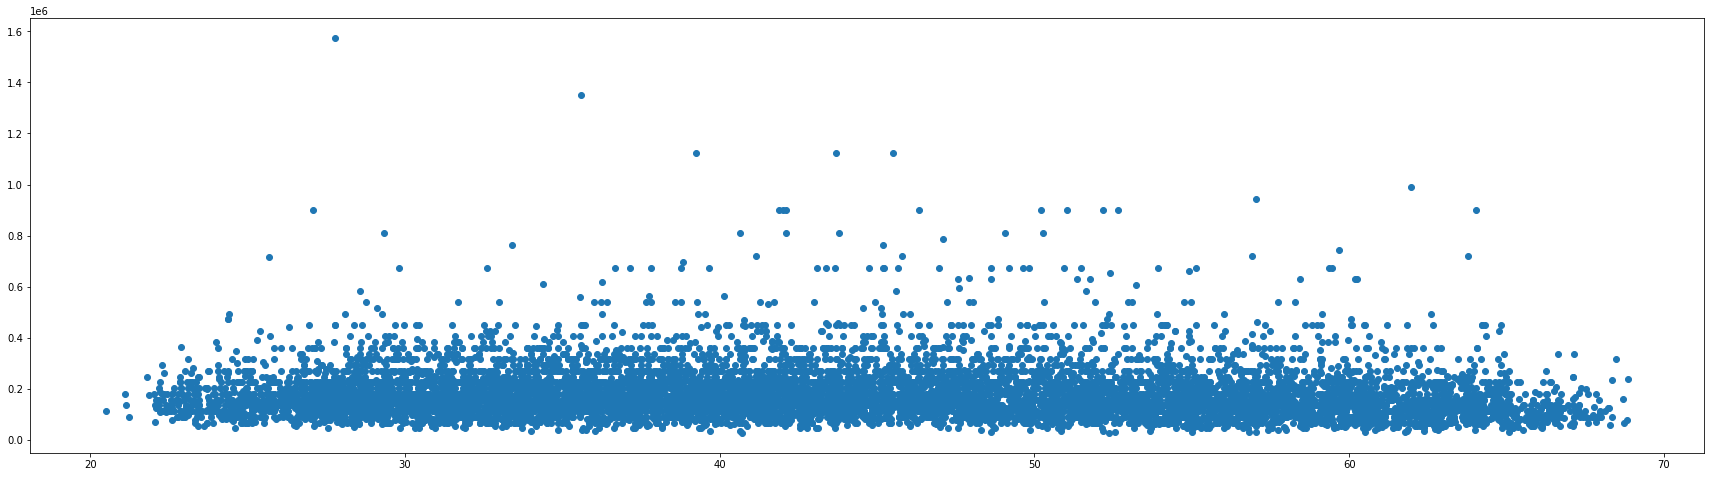

In [15]:
plt.figure(figsize = (30,8))
plt.scatter(data["Age"], data["Total_income"])

## COUNTPLOT

In [16]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=data[feature], hue='Gender' , data=data)
        plt.legend(loc='best')
        total = len(data[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

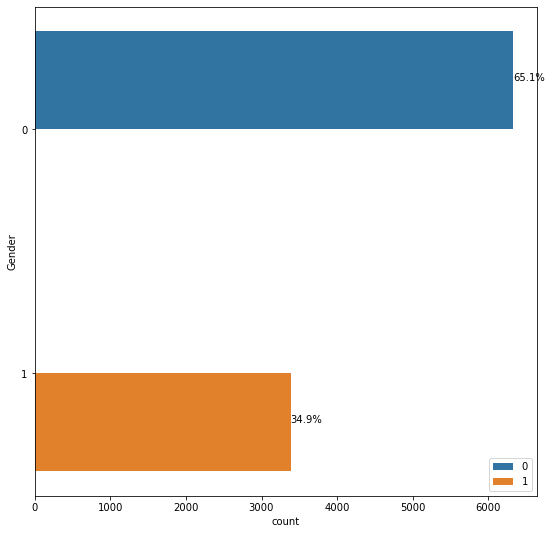

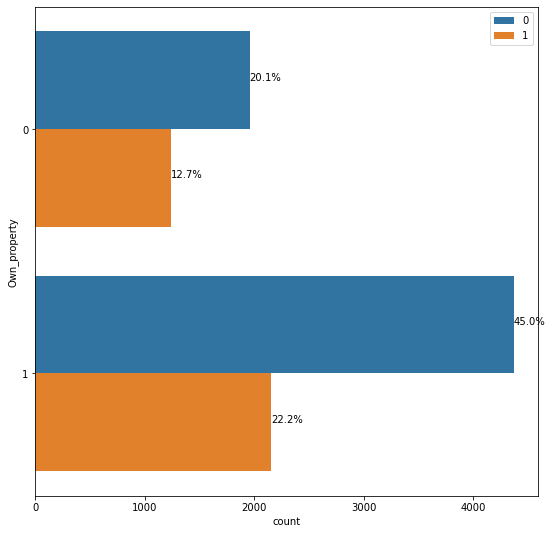

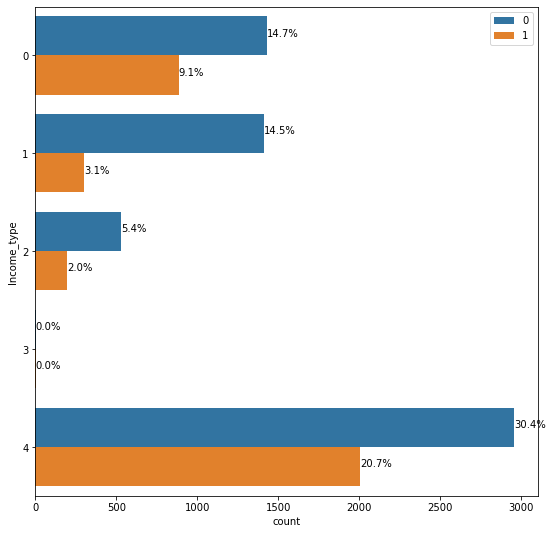

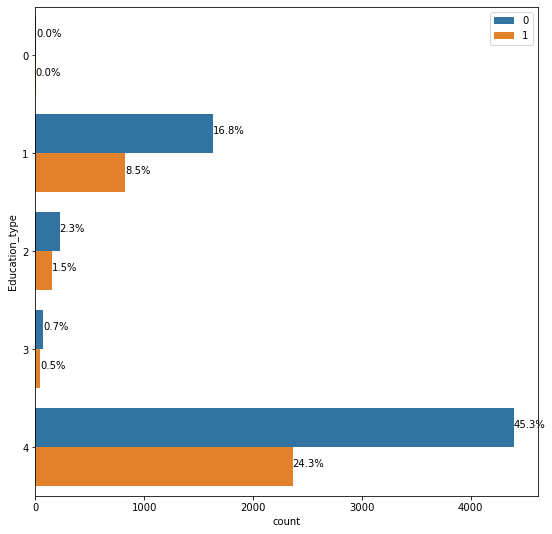

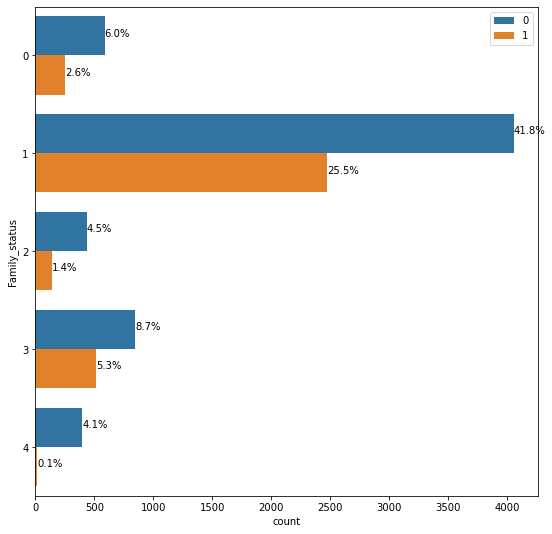

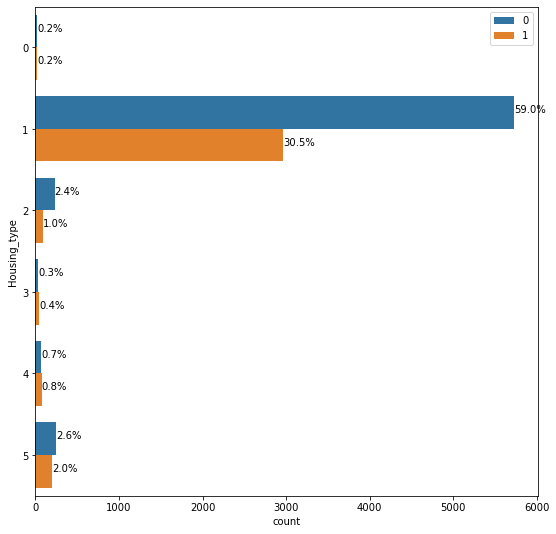

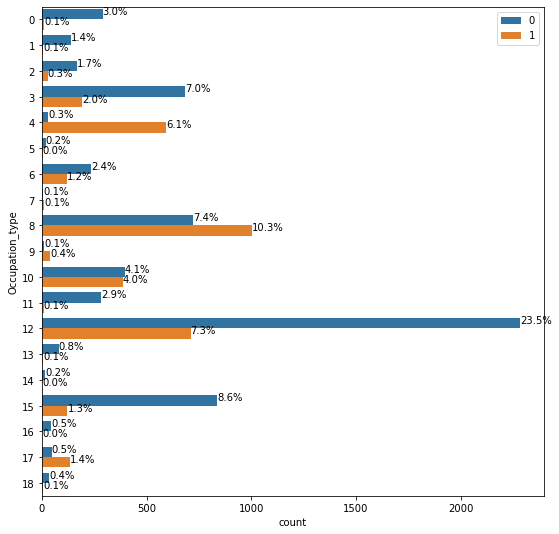

In [17]:
countplot_applicants(['Gender', 'Own_property', 'Income_type', 'Education_type', 'Family_status', 'Housing_type', 'Occupation_type'])

## PAIRPLOT

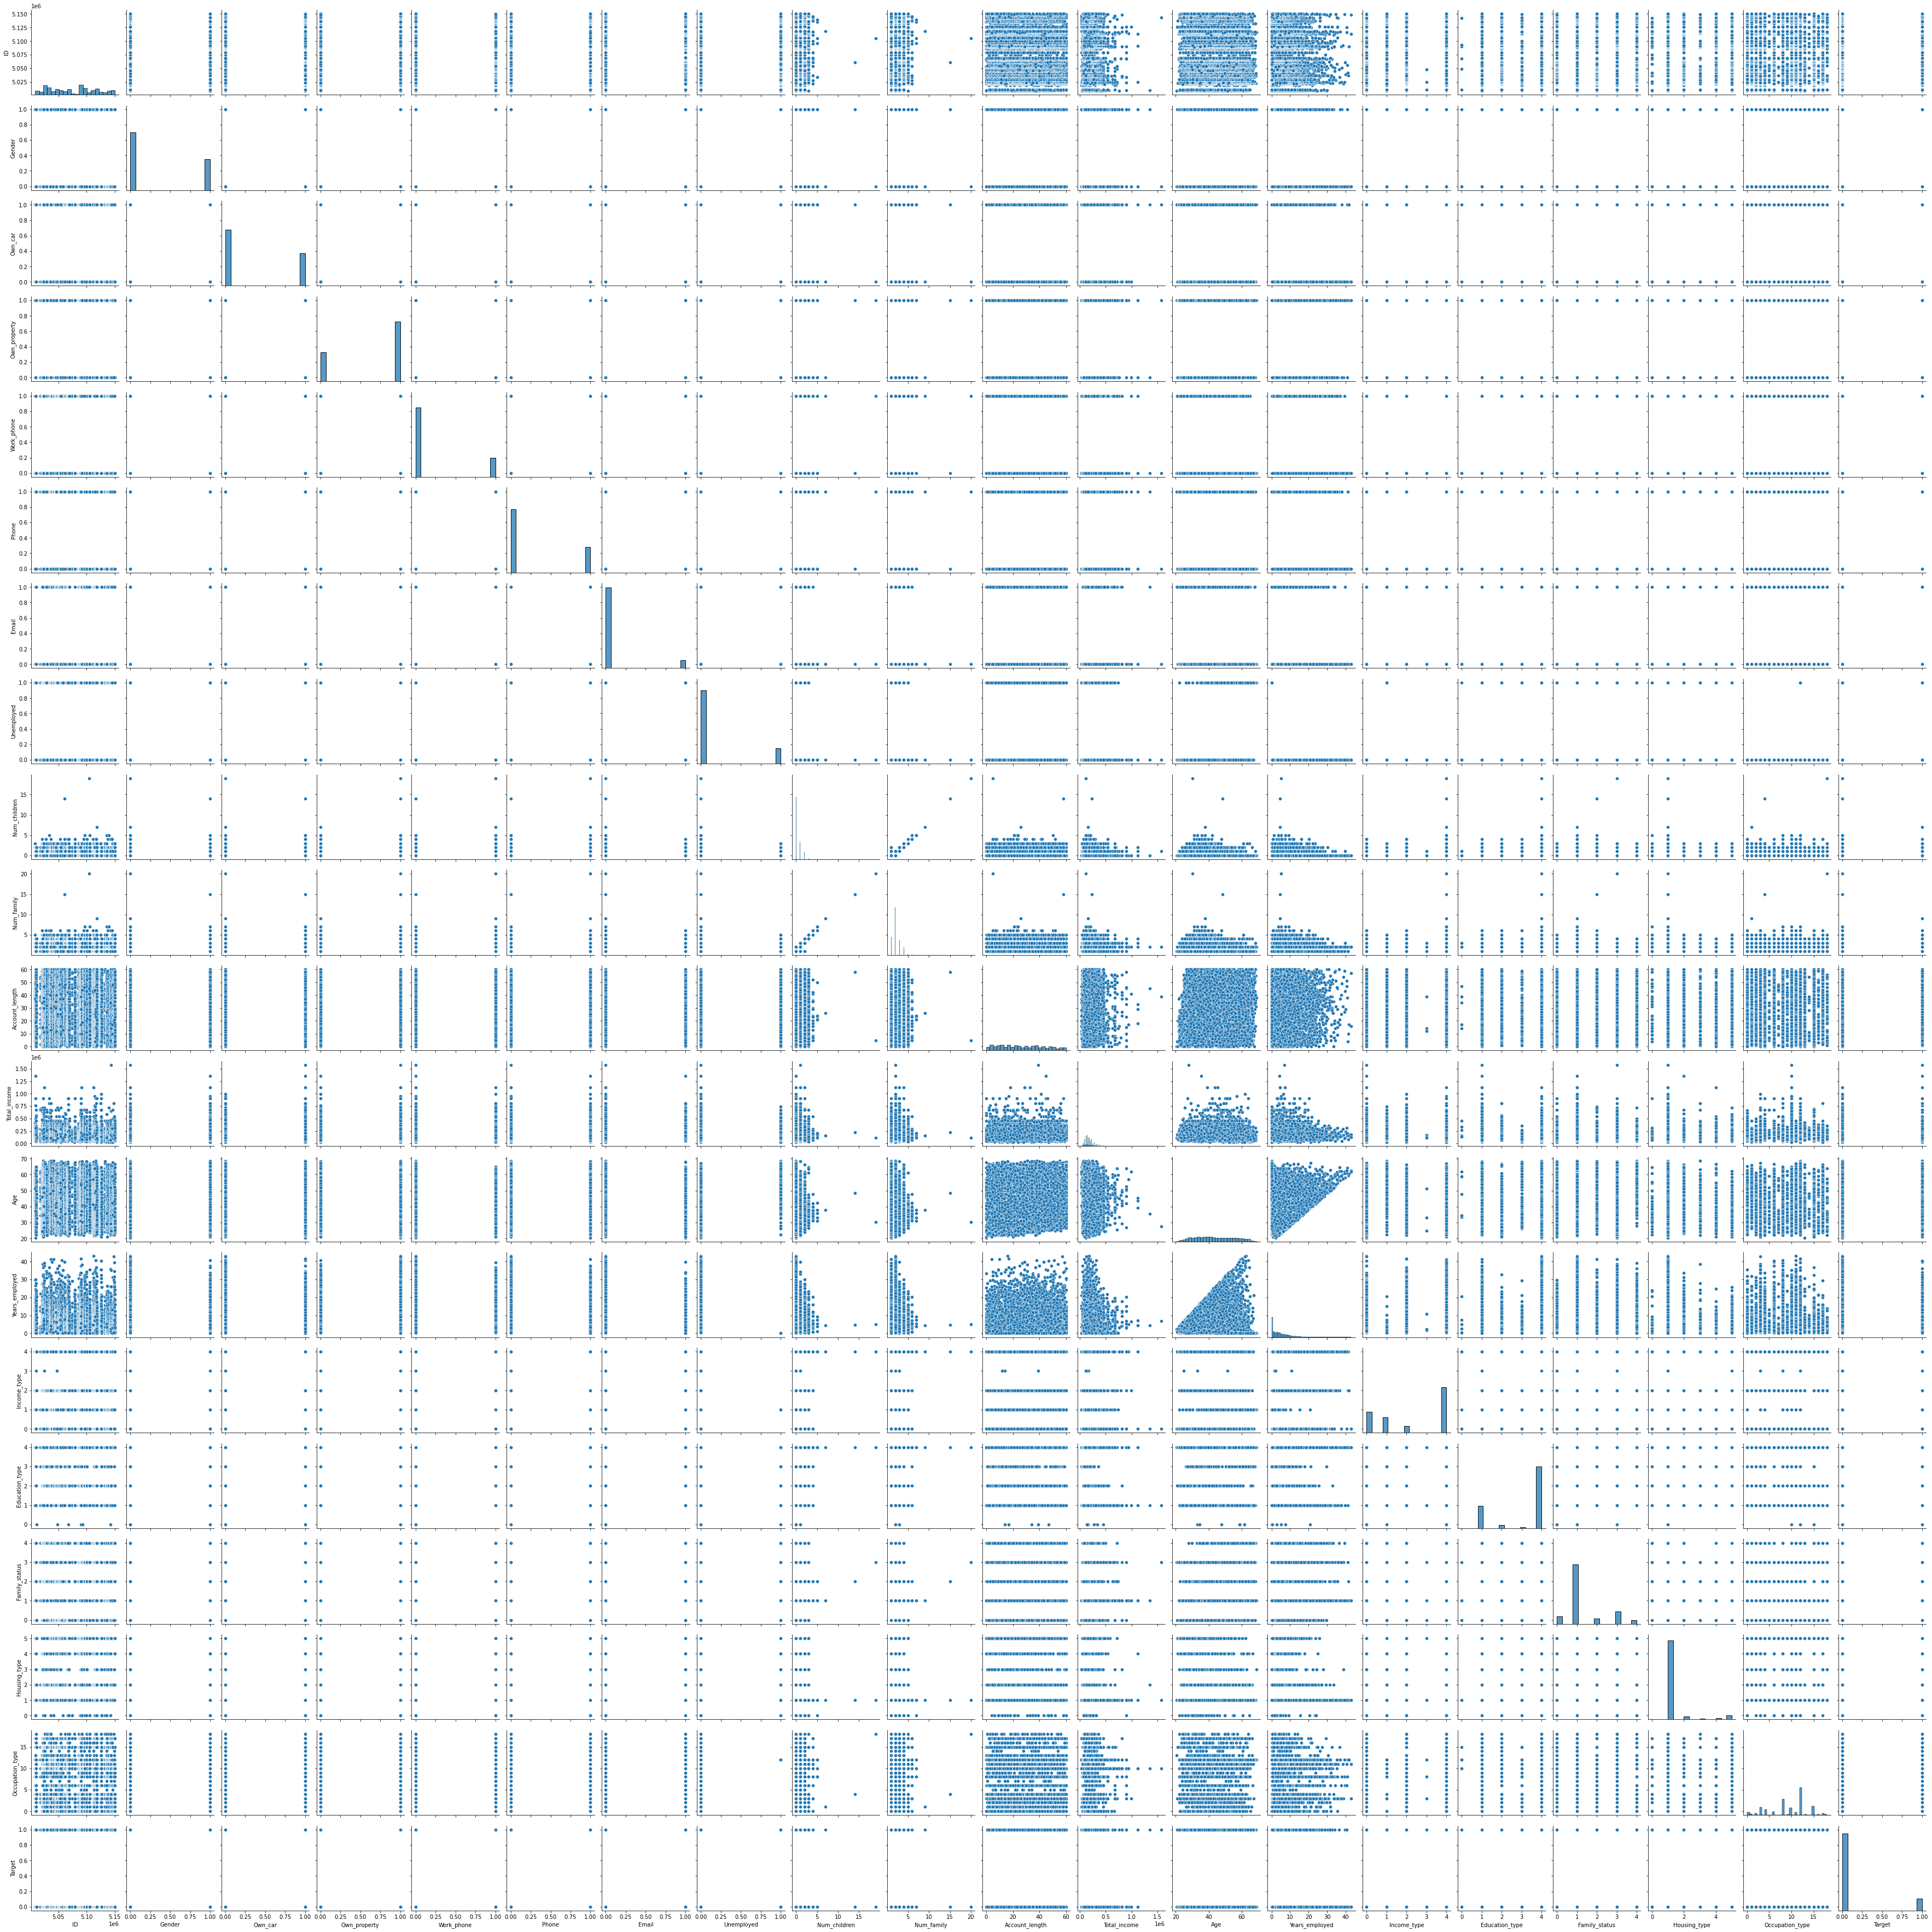

In [18]:
sns.pairplot(data)

## SPLITTING FEATURES AND LABELS

In [19]:
X = data.drop("Target", axis = 1)
y = data["Target"]

## SCALING (DATA PREPROCESSING)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## TRAIN TEST SPLIT

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=555, stratify=y)

## MODEL BUILDING

## RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

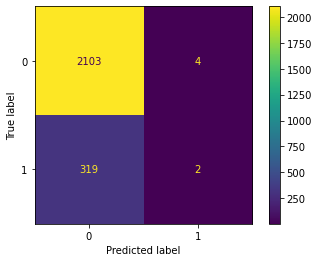

In [24]:
plot_confusion_matrix(rf, X_test, y_test)

In [73]:
acc_rf = accuracy_score(y_pred_rf, y_test)
acc_rf

0.8669686985172982

In [99]:
report_rf = classification_report(y_pred_rf, y_test,output_dict= True)
report_rf = pd.DataFrame(report_rf).transpose()
report_rf

,precision,recall,f1-score,support
0,0.998102,0.868291,0.928682,2422.000000
1,0.006231,0.333333,0.012232,6.000000
accuracy,0.866969,0.866969,0.866969,0.866969
macro avg,0.502166,0.600812,0.470457,2428.000000
weighted avg,0.995650,0.866969,0.926417,2428.000000


## LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

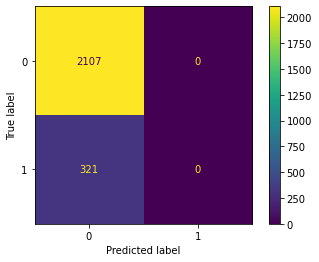

In [39]:
plot_confusion_matrix(lr, X_test, y_test)

In [40]:
acc_lr = accuracy_score(y_pred_lr, y_test)
acc_lr

0.8677924217462932

In [98]:
report_lr = classification_report(y_pred_lr, y_test,output_dict= True)
report_lr = pd.DataFrame(report_lr).transpose()
report_lr

,precision,recall,f1-score,support
0,1.000000,0.867792,0.929217,2428.000000
1,0.000000,0.000000,0.000000,0.000000
accuracy,0.867792,0.867792,0.867792,0.867792
macro avg,0.500000,0.433896,0.464609,2428.000000
weighted avg,1.000000,0.867792,0.929217,2428.000000


## KNEAREST NEIGHBORS

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

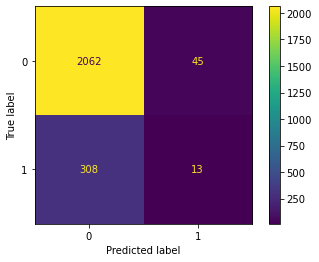

In [44]:
plot_confusion_matrix(knn, X_test, y_test)

In [45]:
acc_knn = accuracy_score(y_pred_knn, y_test)
acc_knn

0.8546128500823723

In [97]:
report_knn = classification_report(y_pred_knn, y_test,output_dict= True)
report_knn = pd.DataFrame(report_knn).transpose()
report_knn

,precision,recall,f1-score,support
0,0.978643,0.870042,0.921153,2370.000000
1,0.040498,0.224138,0.068602,58.000000
accuracy,0.854613,0.854613,0.854613,0.854613
macro avg,0.509571,0.547090,0.494877,2428.000000
weighted avg,0.956232,0.854613,0.900787,2428.000000


## NAIVE BAYES

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

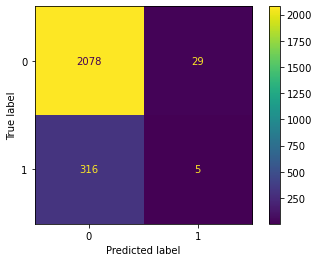

In [49]:
plot_confusion_matrix(nb, X_test, y_test)

In [50]:
acc_nb = accuracy_score(y_pred_nb, y_test)
acc_nb

0.8579077429983526

In [96]:
report_nb = classification_report(y_pred_nb, y_test,output_dict= True)
report_nb = pd.DataFrame(report_nb).transpose()
report_nb

,precision,recall,f1-score,support
0,0.986236,0.868003,0.923350,2394.000000
1,0.015576,0.147059,0.028169,34.000000
accuracy,0.857908,0.857908,0.857908,0.857908
macro avg,0.500906,0.507531,0.475760,2428.000000
weighted avg,0.972644,0.857908,0.910815,2428.000000


## SUPPORT VECTOR MACHINES

In [52]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [53]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

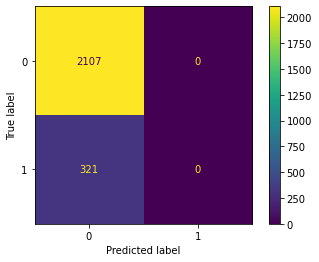

In [54]:
plot_confusion_matrix(svm, X_test, y_test)

In [55]:
acc_svm = accuracy_score(y_pred_svm, y_test)
acc_svm

0.8677924217462932

In [95]:
report_svm = classification_report(y_pred_svm, y_test,output_dict= True)
report_svm = pd.DataFrame(report_svm).transpose()
report_svm

,precision,recall,f1-score,support
0,1.000000,0.867792,0.929217,2428.000000
1,0.000000,0.000000,0.000000,0.000000
accuracy,0.867792,0.867792,0.867792,0.867792
macro avg,0.500000,0.433896,0.464609,2428.000000
weighted avg,1.000000,0.867792,0.929217,2428.000000


## XGBOOST

In [57]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

[06:13:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
y_pred_xgb = XGB.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

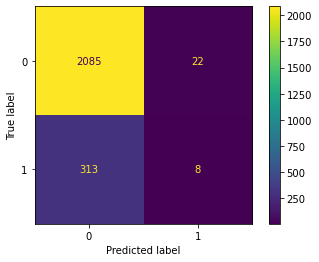

In [59]:
plot_confusion_matrix(XGB, X_test, y_test)

In [60]:
acc_xgb = accuracy_score(y_pred_xgb, y_test)
acc_xgb

0.8620263591433278

In [94]:
report_xgb = classification_report(y_pred_xgb, y_test,output_dict= True)
report_xgb = pd.DataFrame(report_xgb).transpose()
report_xgb

,precision,recall,f1-score,support
0,0.989559,0.869475,0.925638,2398.000000
1,0.024922,0.266667,0.045584,30.000000
accuracy,0.862026,0.862026,0.862026,0.862026
macro avg,0.507240,0.568071,0.485611,2428.000000
weighted avg,0.977640,0.862026,0.914764,2428.000000


## DECISION TREE

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

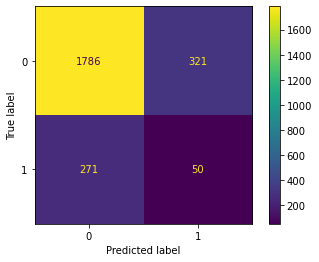

In [64]:
plot_confusion_matrix(dt, X_test, y_test)

In [65]:
acc_dt = accuracy_score(y_pred_dt, y_test)
acc_dt

0.7561779242174629

In [109]:
report_dt = classification_report(y_pred_dt, y_test, output_dict= True)
report_dt = pd.DataFrame(report_dt).transpose()
report_dt

,precision,recall,f1-score,support
0,0.847651,0.868255,0.857829,2057.000000
1,0.155763,0.134771,0.144509,371.000000
accuracy,0.756178,0.756178,0.756178,0.756178
macro avg,0.501707,0.501513,0.501169,2428.000000
weighted avg,0.741930,0.756178,0.748833,2428.000000


In [90]:
models = ["Random Forest", "Logistic Regression", "Decision Tree", "Naive Bayes", "Support Vector Machines", "XG Boost", "KNearest Neighbors"]
models_acc = [acc_rf, acc_lr, acc_dt, acc_nb, acc_svm, acc_xgb, acc_knn]
models_dict = {"Model": models, "Accuracy": models_acc}

In [134]:
report = [report_rf.iloc[1],report_lr.iloc[1],report_dt.iloc[1],report_nb.iloc[1],report_svm.iloc[1],report_xgb.iloc[1],report_knn.iloc[1]]
report_df = pd.DataFrame(report).reset_index()
report_df.drop("index", axis = 1, inplace = True)
report_df["Model"] = models
columns = report_df.columns.tolist()
columns = columns[-1:] + columns[:-1]
report_df = report_df[columns]
report_df

,Model,precision,recall,f1-score,support
0,Random Forest,0.006231,0.333333,0.012232,6.0
1,Logistic Regression,0.000000,0.000000,0.000000,0.0
2,Decision Tree,0.155763,0.134771,0.144509,371.0
3,Naive Bayes,0.015576,0.147059,0.028169,34.0
4,Support Vector Machines,0.000000,0.000000,0.000000,0.0
5,XG Boost,0.024922,0.266667,0.045584,30.0
6,KNearest Neighbors,0.040498,0.224138,0.068602,58.0


In [129]:
model_acc = pd.DataFrame(models_dict)
model_acc

,Model,Accuracy
0,Random Forest,0.866969
1,Logistic Regression,0.867792
2,Decision Tree,0.756178
3,Naive Bayes,0.857908
4,Support Vector Machines,0.867792
5,XG Boost,0.862026
6,KNearest Neighbors,0.854613


In [135]:
model_compare = report_df.merge(model_acc, how="outer", on = "Model")
model_compare

,Model,precision,recall,f1-score,support,Accuracy
0,Random Forest,0.006231,0.333333,0.012232,6.0,0.866969
1,Logistic Regression,0.000000,0.000000,0.000000,0.0,0.867792
2,Decision Tree,0.155763,0.134771,0.144509,371.0,0.756178
3,Naive Bayes,0.015576,0.147059,0.028169,34.0,0.857908
4,Support Vector Machines,0.000000,0.000000,0.000000,0.0,0.867792
5,XG Boost,0.024922,0.266667,0.045584,30.0,0.862026
6,KNearest Neighbors,0.040498,0.224138,0.068602,58.0,0.854613


- Every model except Decision Tree has accuracy above 85% so we try to increase the accuracy of decision tree using gridsearch cv

## HYPER PARAMETER TUNING

## INCREASING THE ACCURACY OF DECISION TREE BY GRIDSEARCHCV

In [136]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)
gs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [137]:
gs_dt.best_params_

{'max_leaf_nodes': 7, 'min_samples_split': 2}

In [138]:
gs_dt.score(X_test, y_test)

0.8673805601317958